In [2]:
from extract_erps import process_data
eeg_file_paths = [r"data/Sample3.csv",r"data/Sample4.csv"]
metadata_file_path = [r"metadata/Sample3.csv",r"metadata/Sample4.csv"]
output_dir_name = "outputs"
process_data(eeg_file_paths,metadata_file_path, output_dir_name=output_dir_name, onset_time = 0, after_time = 1.0, sr = 125)

  0%|          | 0/2 [00:00<?, ?it/s]

EEG timestamp: 2025-02-25 09:42:53.939152+00:00
Trial timestamp: 2025-02-25 09:43:15.131291+00:00
Difference in seconds: 21.192139
EEG timestamp: 2025-02-25 09:42:53.939389+00:00
Trial timestamp: 2025-02-25 09:43:15.131291+00:00
Difference in seconds: 21.191902
EEG timestamp: 2025-02-25 09:42:53.939622+00:00
Trial timestamp: 2025-02-25 09:43:15.131291+00:00
Difference in seconds: 21.191669
EEG timestamp: 2025-02-25 09:42:53.939850+00:00
Trial timestamp: 2025-02-25 09:43:15.131291+00:00
Difference in seconds: 21.191441
EEG timestamp: 2025-02-25 09:42:53.940076+00:00
Trial timestamp: 2025-02-25 09:43:15.131291+00:00
Difference in seconds: 21.191215
EEG timestamp: 2025-02-25 09:42:53.940305+00:00
Trial timestamp: 2025-02-25 09:43:15.131291+00:00
Difference in seconds: 21.190986
EEG timestamp: 2025-02-25 09:42:53.940597+00:00
Trial timestamp: 2025-02-25 09:43:15.131291+00:00
Difference in seconds: 21.190694
EEG timestamp: 2025-02-25 09:42:53.941247+00:00
Trial timestamp: 2025-02-25 09:43:1

 50%|█████     | 1/2 [00:00<00:00,  1.14it/s]

EEG timestamp: 2025-02-25 09:43:05.237543+00:00
Trial timestamp: 2025-02-25 09:43:15.131291+00:00
Difference in seconds: 9.893748
EEG timestamp: 2025-02-25 09:43:05.237607+00:00
Trial timestamp: 2025-02-25 09:43:15.131291+00:00
Difference in seconds: 9.893684
EEG timestamp: 2025-02-25 09:43:05.237669+00:00
Trial timestamp: 2025-02-25 09:43:15.131291+00:00
Difference in seconds: 9.893622
EEG timestamp: 2025-02-25 09:43:05.237742+00:00
Trial timestamp: 2025-02-25 09:43:15.131291+00:00
Difference in seconds: 9.893549
EEG timestamp: 2025-02-25 09:43:05.237843+00:00
Trial timestamp: 2025-02-25 09:43:15.131291+00:00
Difference in seconds: 9.893448
EEG timestamp: 2025-02-25 09:43:05.237909+00:00
Trial timestamp: 2025-02-25 09:43:15.131291+00:00
Difference in seconds: 9.893382
EEG timestamp: 2025-02-25 09:43:05.237971+00:00
Trial timestamp: 2025-02-25 09:43:15.131291+00:00
Difference in seconds: 9.89332
EEG timestamp: 2025-02-25 09:43:05.238034+00:00
Trial timestamp: 2025-02-25 09:43:15.131291

100%|██████████| 2/2 [00:02<00:00,  1.04s/it]

EEG timestamp: 2025-02-25 10:20:04.131224+00:00
Trial timestamp: 2025-02-25 10:20:04.404156+00:00
Difference in seconds: 0.272932
EEG timestamp: 2025-02-25 10:20:04.131240+00:00
Trial timestamp: 2025-02-25 10:20:04.404156+00:00
Difference in seconds: 0.272916
EEG timestamp: 2025-02-25 10:20:04.131256+00:00
Trial timestamp: 2025-02-25 10:20:04.404156+00:00
Difference in seconds: 0.2729
EEG timestamp: 2025-02-25 10:20:04.131272+00:00
Trial timestamp: 2025-02-25 10:20:04.404156+00:00
Difference in seconds: 0.272884
EEG timestamp: 2025-02-25 10:20:04.131288+00:00
Trial timestamp: 2025-02-25 10:20:04.404156+00:00
Difference in seconds: 0.272868
EEG timestamp: 2025-02-25 10:20:04.131303+00:00
Trial timestamp: 2025-02-25 10:20:04.404156+00:00
Difference in seconds: 0.272853
EEG timestamp: 2025-02-25 10:20:04.131354+00:00
Trial timestamp: 2025-02-25 10:20:04.404156+00:00
Difference in seconds: 0.272802
EEG timestamp: 2025-02-25 10:20:04.131370+00:00
Trial timestamp: 2025-02-25 10:20:04.404156+

In [3]:
import numpy as np 
incongruent_trial = np.load("outputs/incongruent_trials_Sample3.npy")
print(incongruent_trial.shape)

(147, 16, 125)


In [ ]:
import numpy as np 
congruent_trial = np.load("outputs/congruent_trials_Sample1.npy")
print(congruent_trial.shape)

(92, 16, 125)


In [90]:
import pandas as pd
raw_data = pd.read_csv(r"data/Sample2.csv", sep = '\t', header=None).dropna().iloc[32250:33500,1:17]
raw_data

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
32250,-20080.784867,20078.437934,-1179.233334,-11316.285886,-83641.680615,-31944.733196,27521.188858,16914.481451,-51486.684559,-699.251974,-23477.065382,-52965.699490,-31820.859828,-55115.579678,-51521.329763,-45083.736787
32251,-20169.633051,20110.825611,-1627.922252,-11747.965127,-83670.424959,-31931.031577,27178.246043,16756.164045,-51478.481469,-649.049955,-23516.627969,-52941.112571,-31789.567386,-55111.601068,-51530.091647,-45077.455947
32252,-20082.215379,20078.616748,-1202.166224,-11324.176052,-83629.655377,-31929.645768,27498.613596,16916.291942,-51474.167582,-744.916587,-23508.290769,-52963.643129,-31841.244619,-55104.001475,-51513.886632,-45074.974903
32253,-20164.380391,20115.586533,-1597.367417,-11730.150787,-83671.162566,-31936.038367,27211.952473,16769.329222,-51478.526172,-599.585545,-23488.889454,-52955.283577,-31750.898868,-55112.338676,-51533.980850,-45084.005008
32254,-20081.477771,20083.310614,-1221.344021,-11333.206157,-83609.270586,-31914.737155,27478.720543,16919.935277,-51448.641890,-773.660931,-23537.415092,-52939.346783,-31847.279590,-55082.074414,-51504.029513,-45056.490011
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33495,-20378.577158,20310.560800,-1865.700110,-11692.018711,-83633.075194,-32227.639225,27256.454796,17274.389240,-51408.811082,-91.820966,-24029.824022,-53274.555895,-31727.630702,-55260.508390,-51732.509045,-45486.783443
33496,-20382.354603,20328.755120,-1805.283344,-11708.737815,-83712.803866,-32294.649755,27355.808300,17260.486455,-51458.856637,236.772029,-23819.896438,-53340.091209,-31550.783700,-55320.880451,-51789.953028,-45547.446078
33497,-20399.632502,20307.073928,-1931.861273,-11752.591938,-83657.483298,-32240.647941,27201.380098,17250.115246,-51413.460244,-97.855937,-24037.602429,-53265.928121,-31750.921220,-55263.995262,-51755.397231,-45488.750397
33498,-20394.290435,20307.476259,-1748.152286,-11660.547454,-83741.659968,-32329.183201,27399.617720,17279.127810,-51491.803109,233.173398,-23820.410528,-53344.762724,-31572.174319,-55339.477103,-51815.791645,-45557.236142


In [13]:
import numpy as np
incongruent_trial = np.array(raw_data).T
print(incongruent_trial.shape)

NameError: name 'raw_data' is not defined

In [28]:
from scipy.signal import butter, filtfilt
from scipy.stats import zscore

def bandpass_filter(data, lowcut, highcut, fs, order=4):
    nyquist = 0.5 * fs  # Nyquist frequency
    low = lowcut / nyquist
    high = highcut / nyquist
    b, a = butter(order, [low, high], btype='band')
    return filtfilt(b, a, data, axis=-1)  # Apply along time axis
alpha_erp = bandpass_filter(incongruent_trial, 0.5, 40, 125)
print(alpha_erp.shape)

(147, 16, 125)


In [29]:
from scipy.stats import zscore
normal_erp = zscore(alpha_erp,axis=-1)
mean_trial = normal_erp.mean(axis=0)
print(mean_trial.shape)

(16, 125)


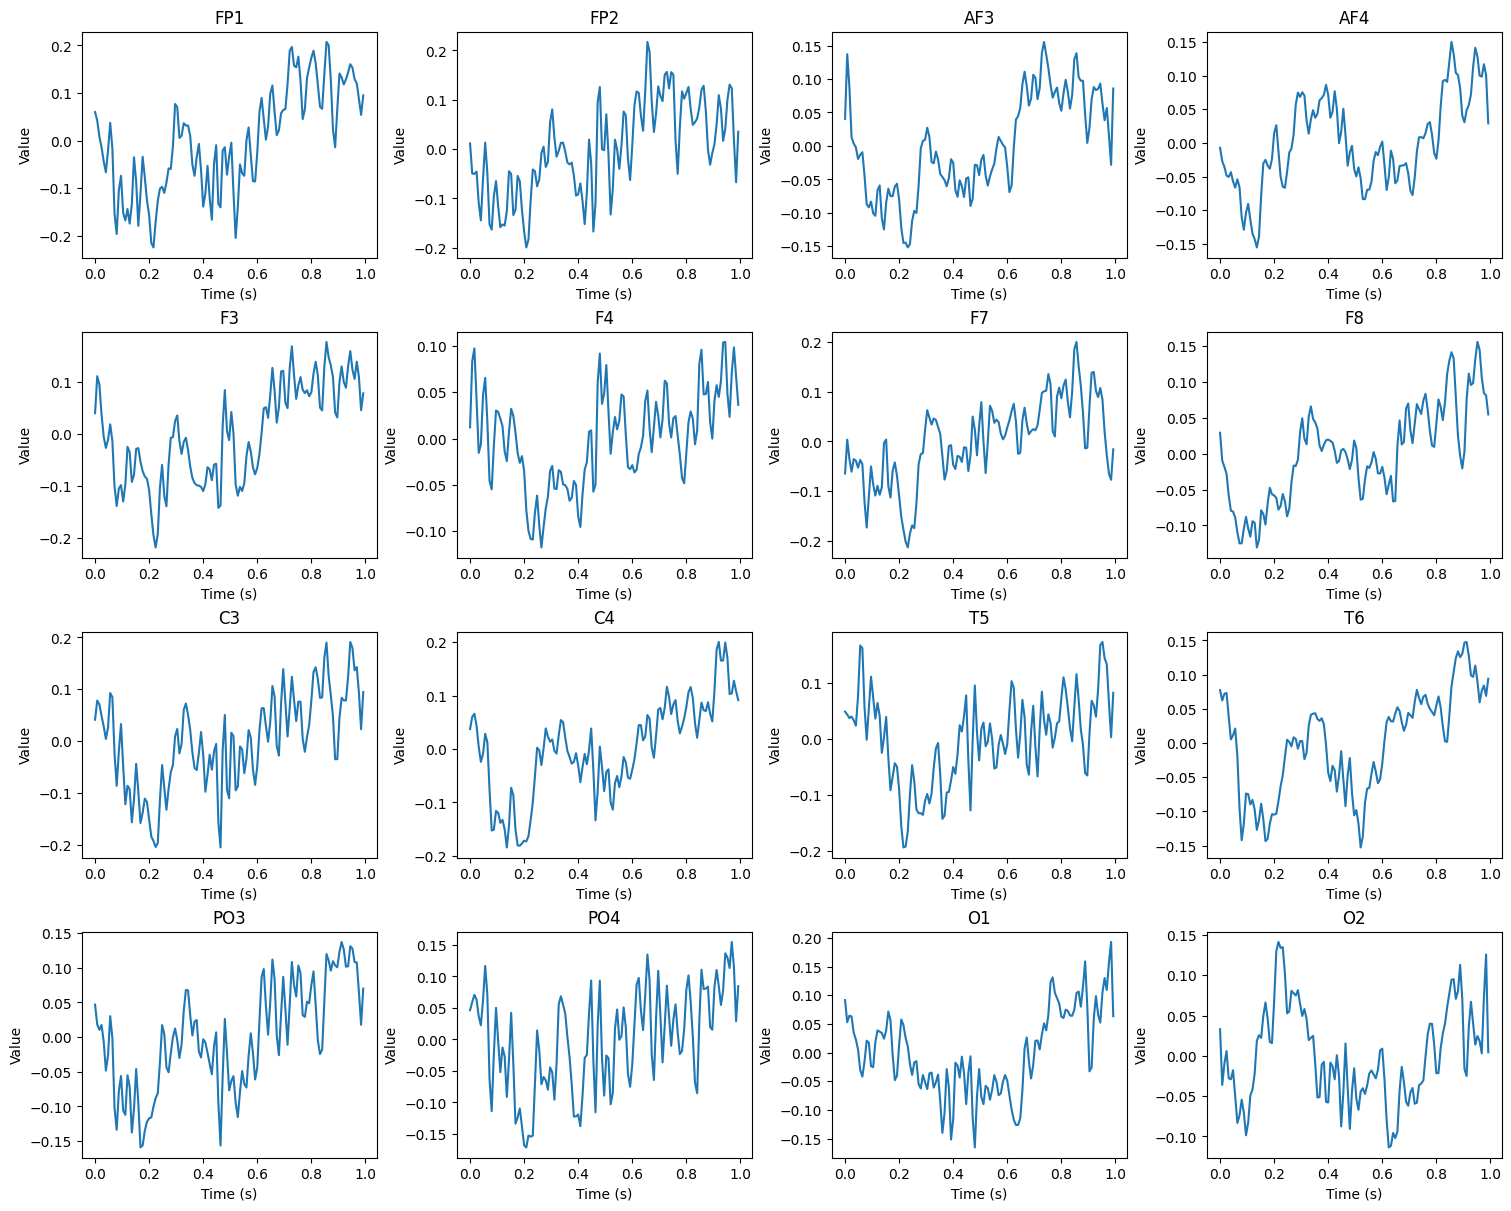

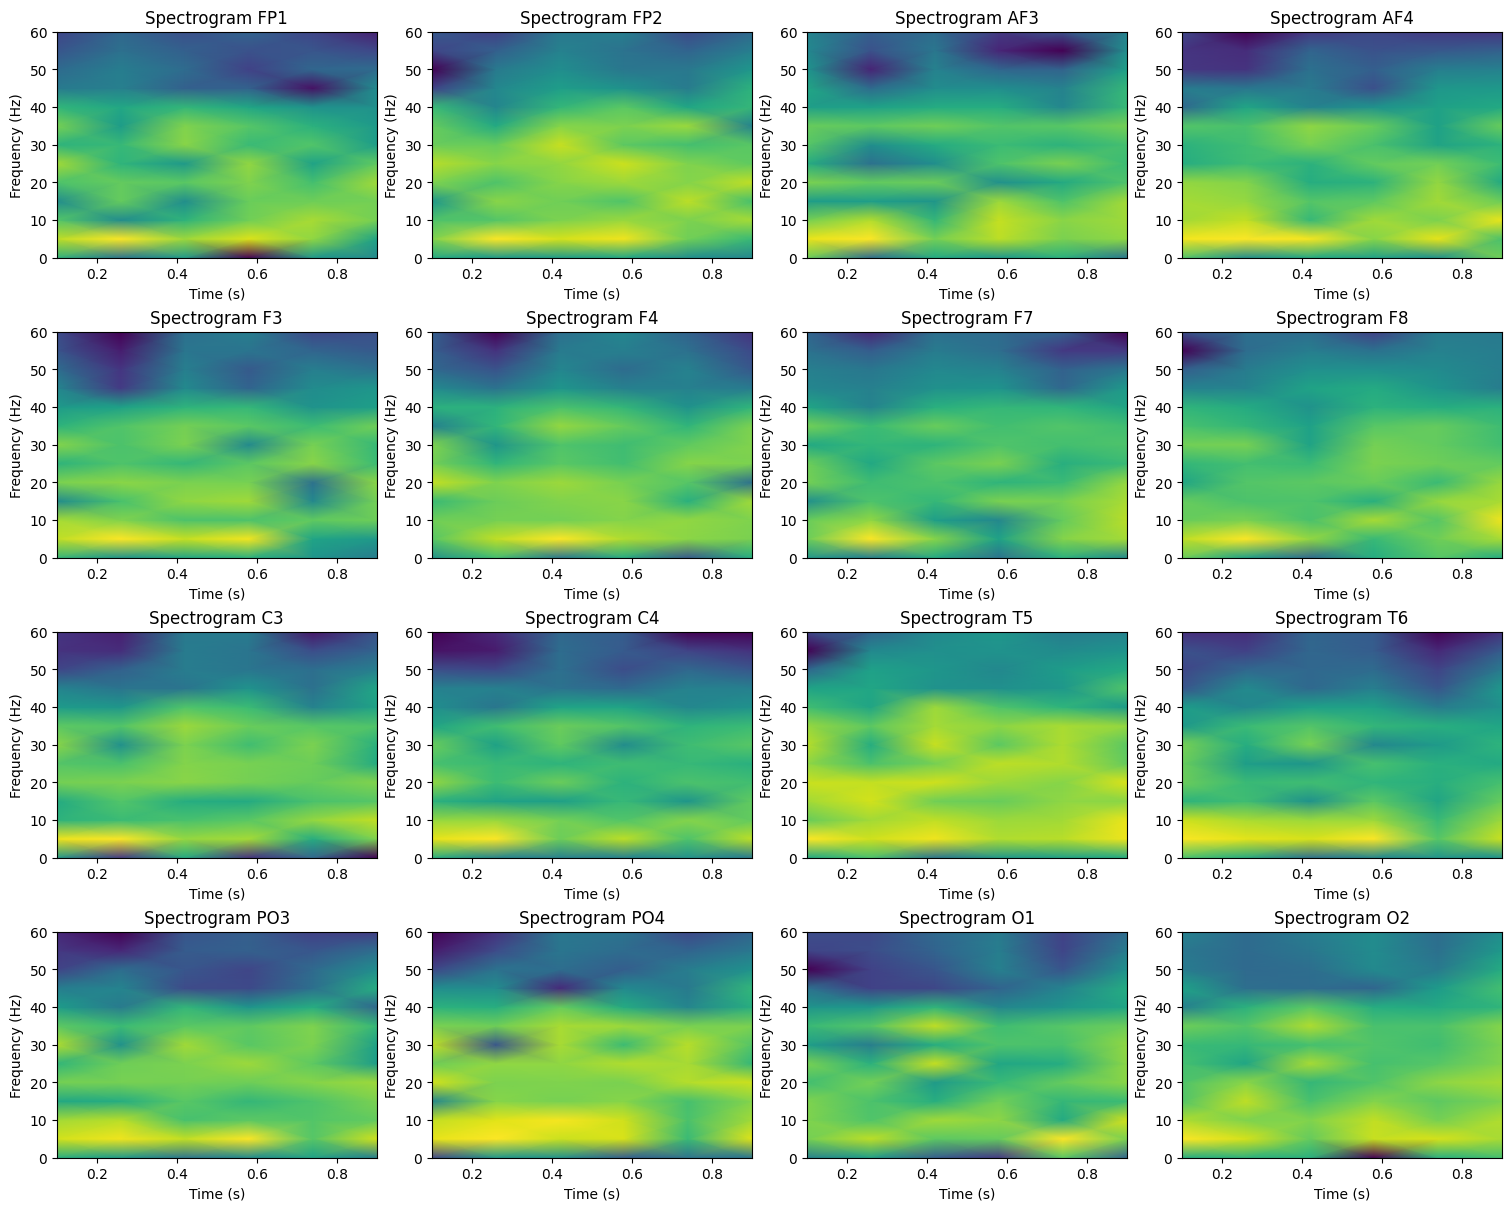

In [30]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from scipy.signal import spectrogram
def plot_channels(channels, data):
  channel_list = ['FP1','FP2','AF3','AF4','F3','F4','F7','F8','C3','C4','T5','T6','PO3','PO4','O1','O2']
  time_values = np.arange(data.shape[1]) / 125
    
  num_channels = len(channels)
  cols = 4  # Number of columns in the subplot
  rows = (num_channels + cols - 1) // cols  # Compute required rows
    
  fig, axes = plt.subplots(rows, cols, figsize=(15, rows * 3), constrained_layout=True)
  axes = axes.flatten()  # Flatten to simplify indexing
    
  for i, channel in enumerate(channels):
      sns.lineplot(ax=axes[i], x=time_values, y=data[channel, :])
      axes[i].set_xlabel("Time (s)")
      axes[i].set_ylabel("Value")
      axes[i].set_title(f"{channel_list[channel]}")
    
  for j in range(i + 1, len(axes)):
      fig.delaxes(axes[j])
  #plt.savefig("plots/erp_1_delta_theta.pdf")
  plt.show()
    
    # Create spectrograms for each channel
  fig, axes = plt.subplots(rows, cols, figsize=(15, rows * 3), constrained_layout=True)
  axes = axes.flatten()
    
  for i, channel in enumerate(channels):
      f, t, Sxx = spectrogram(data[channel, :], fs=125,nperseg=25, noverlap=5)
      axes[i].pcolormesh(t, f, np.log(Sxx + 1e-10), shading='gouraud')
      axes[i].set_xlabel("Time (s)")
      axes[i].set_ylabel("Frequency (Hz)")
      axes[i].set_title(f"Spectrogram {channel_list[channel]}")
    
  for j in range(i + 1, len(axes)):
      fig.delaxes(axes[j])
  #plt.savefig("plots/erp_1_spectrogram.pdf")
  plt.show()

def viz(file_path, trial_id, channels):
  data = np.load(file_path)
  data = data[trial_id]
  plot_channels(channels, data)

plot_channels([i for i in range(16)],mean_trial)